In [58]:
import os
import shutil
import numpy as np
import pandas as pd
import statistics
import math

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



def select_features(df, labels, features, n_features):
    ## create empty lists as placeholders
    grouped_features = []
    for i in range(n_features):
        new = []
        grouped_features.append(new)

    for i in range(len(features)):
        grouped_features[labels[i]].append(features[i])

    selected_features = []
    for fs in grouped_features:
        matrix = df[fs].corr().abs()
        max_f_id = matrix.sum(axis=1).argmax()
        selected_features.append(fs[max_f_id])
        
    return selected_features

# sort the df to traces for every subject and goals
def extract_traces(dfn):
    traces = []

    Subject = 0
    Loc = 0
    Iteration = 0
    tup = (Subject, Loc, Iteration)

    for index, row in dfn.iterrows():
        curr_Subject = row["Subject"]
        curr_Loc = row["Loc"]
        curr_Iteration = row["Iteration"]
        curr_tup = (curr_Subject, curr_Loc, curr_Iteration)

        if curr_tup != tup:
            #print("new trace")
            tup = curr_tup

            rslt_df = dfn[(dfn['Subject'] == curr_Subject) 
                      & (dfn['Loc'] == curr_Loc) 
                      & (dfn['Iteration'] == curr_Iteration)]

            rslt_df.reset_index(drop=True, inplace=True)
            traces.append(rslt_df)
            
    return traces


def convert_labels_kmeans(traces, goals, subject_id):
    # generate classifiers here
    
    subtraces = []
    for goal in goals:
        subtraces_goalX = []
        for t in traces:
            if t["Subject"][0] == subject_id and t["Loc"][0] == goal:
                converted_trace = []
                
                for index,e in t.iterrows():
                    converted_trace.append( e["class"] )
                                        
                subtraces_goalX.append(converted_trace)
        subtraces.append(subtraces_goalX)
            
    return subtraces



############################# file system helpers ########################

# random.randint(0,2)

def reCreateDir(dirName):
    # Check whether the specified path exists or not
    isExist = os.path.exists(dirName)
    if isExist:
        # delete
        shutil.rmtree(dirName)
    
    os.makedirs(dirName)
    
    
# write sas_plan
def write_plan(actions, file):
    string = ""
    for a in actions:
        string += "%s\n" % (str(a))
    string += "; cost %s (unit cost)" % (str(len(actions)))
    
    file1 = open(file, "w")
    file1.write(string)
    file1.close()
    return 0
        
# write_plan(subtraces_goal2[1], "sas_plan.1")


In [59]:
def show_correlations(matrix):
    # Create cmap
    cmap = sns.diverging_palette(300, 15, s=75, l=40, n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(40,40))
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)
    
    plt.savefig('heatmap.pdf', format='pdf')
    
    # Show the plot
    plt.show()

    
## plot dendrogram
def show_dendrogram(data):
    plt.figure(figsize=(40, 40))
    linkage_data = linkage(data, method='ward', metric='euclidean')
    dendrogram(linkage_data)
    plt.show()
    
    
def select_features(df, labels, features, n_features):
    ## create empty lists as placeholders
    grouped_features = []
    for i in range(n_features):
        new = []
        grouped_features.append(new)

    for i in range(len(features)):
        grouped_features[labels[i]].append(features[i])

    selected_features = []
    for fs in grouped_features:
        matrix = df[fs].corr().abs()
        max_f_id = matrix.sum(axis=1).argmax()
        selected_features.append(fs[max_f_id])
        
    return selected_features

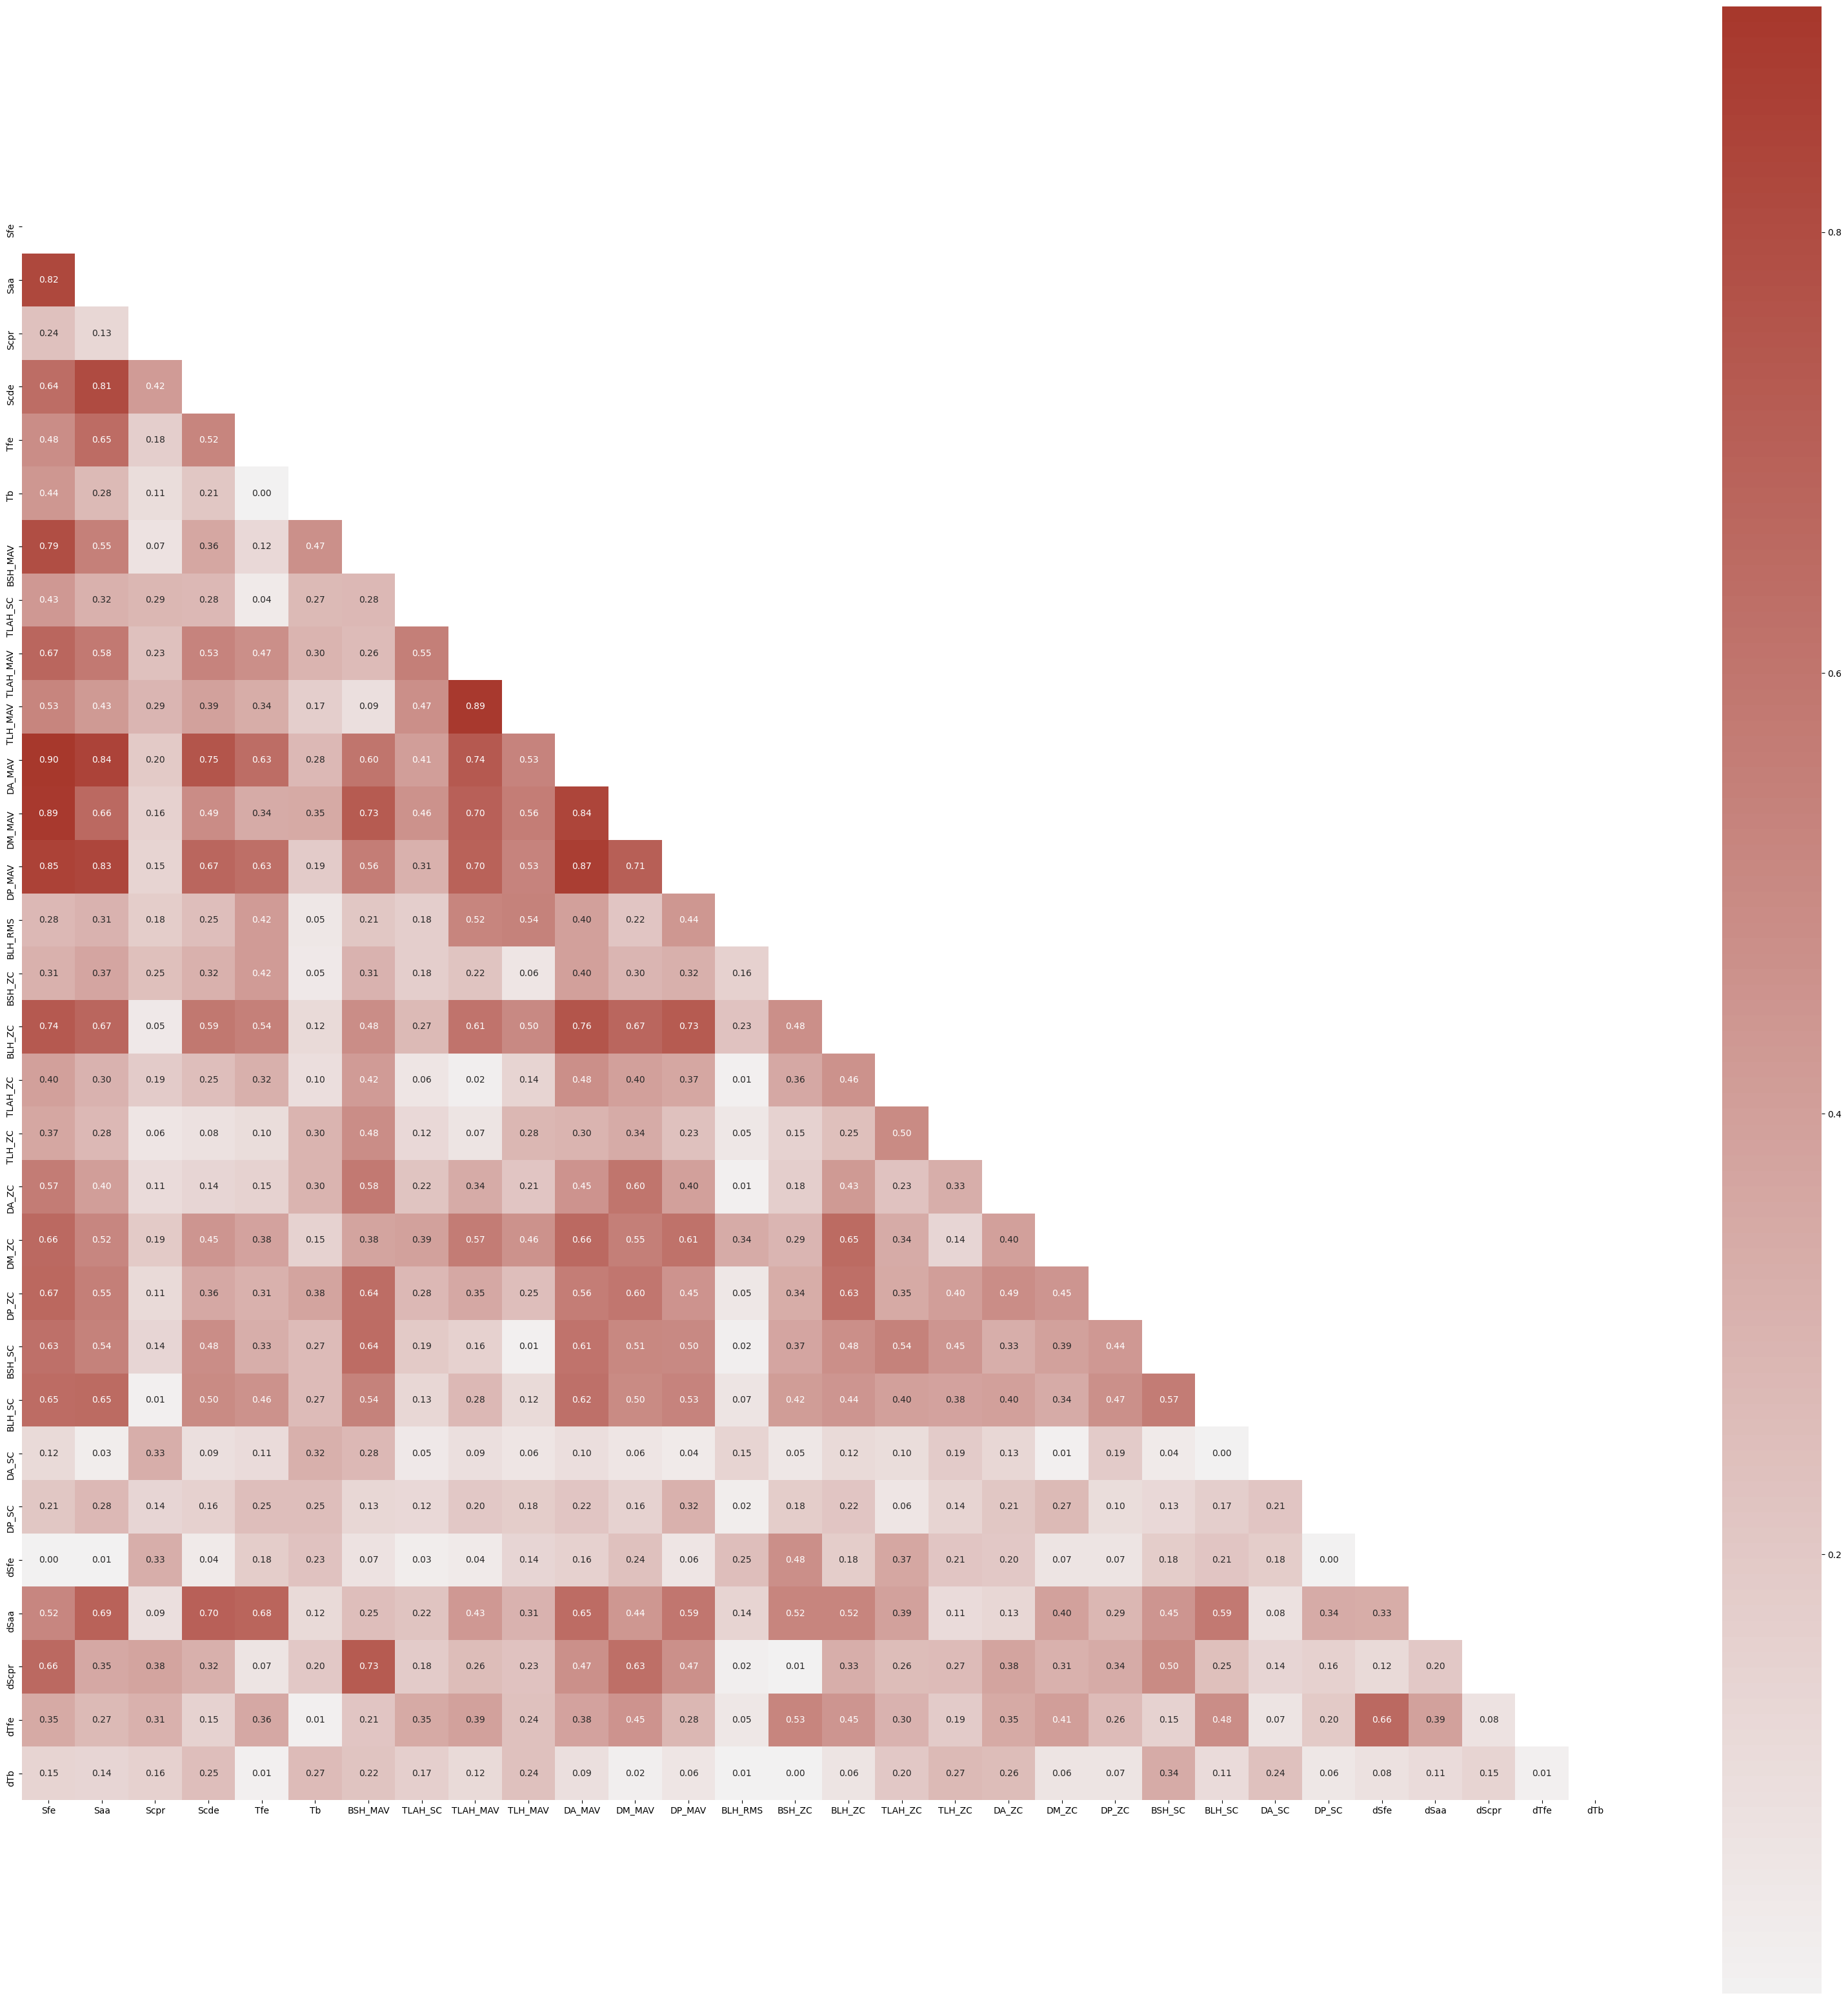

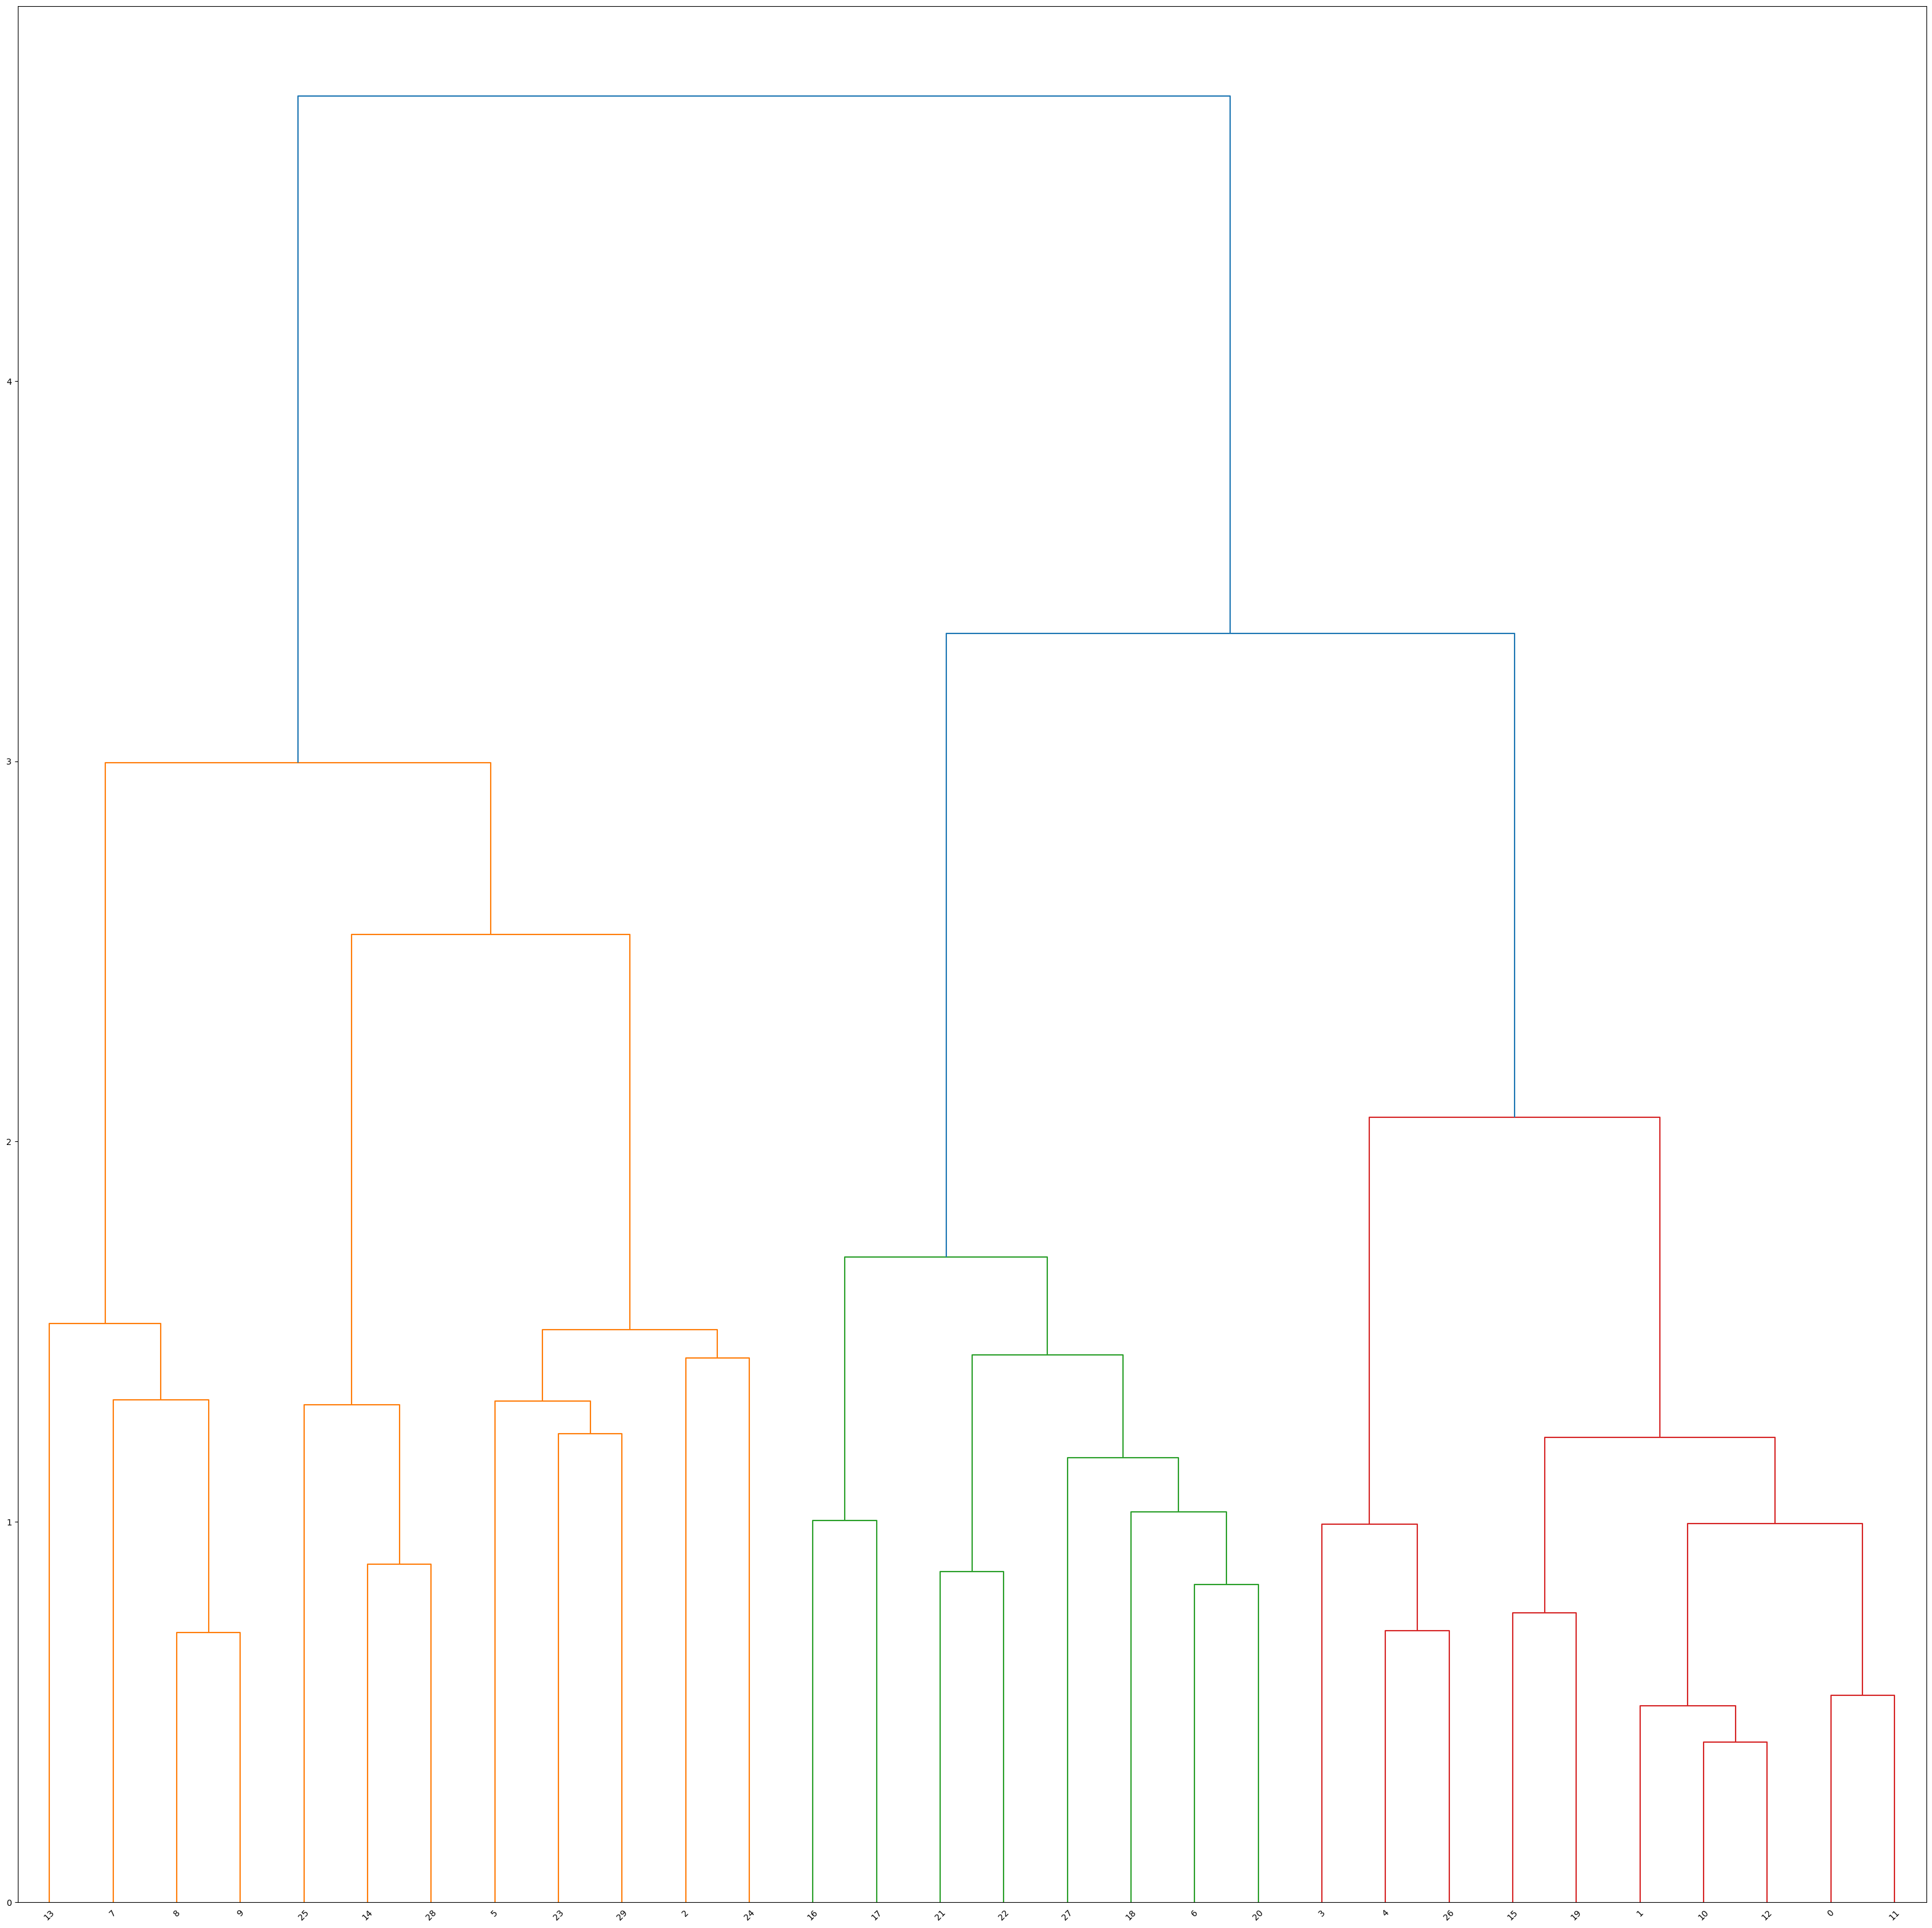

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

show_correlations(corr_matrix)

show_dendrogram(corr_matrix)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[ 0  0 10  5  5 12  1 11  9  9  0  0  0  7  3  0  2  2  1  0  1  4  4 14
  8 13  5  1  3  6]
None


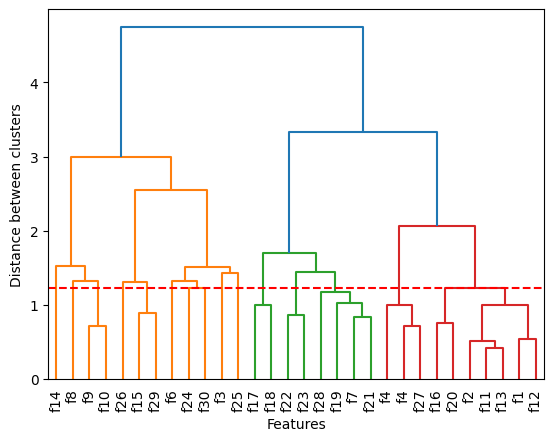

In [66]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# agglomerative_clustering = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=1.23).fit(corr_matrix)
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_features, affinity='euclidean', linkage='ward').fit(corr_matrix)

linkage_matrix = linkage(corr_matrix,method='ward')
# Obtain the linkage matrix
print(agglomerative_clustering.labels_)
print(agglomerative_clustering.distance_threshold)
# Plot the dendrogram

leaf_labels = ['f1','f2','f3','f4','f4','f6','f7','f8','f9','f10','f11',
               'f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24',
               'f25','f26','f27','f28','f29','f30']

dendrogram(linkage_matrix, labels=leaf_labels)

threshold = 1.23
# Add a horizontal line to indicate the cut-off point
plt.axhline(y=threshold, color='r', linestyle='--', label='Cut-off')

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Distance between clusters')
plt.xticks(rotation='vertical', ha='center')

plt.savefig('dendrogram.pdf', format='pdf')
# Show the plot
plt.show()

In [2]:
input_data = "src_small.csv"

index_headers = 4
n_features = 15

n_init = 2
n_clusters = 10
subject_id = 10

# recognizer param:
phi = 50
lamb = 1.5
delta = 1.0
theta = 0.9


# dependent
output_results = "example_results.csv"


# main script
df = pd.read_csv(input_data)

## the number of irrelevant features : index_headers
all_features = df.columns.values.tolist()[index_headers::]
df_context = df[all_features]
    
############################## select features ##############################
corr_matrix = df_context.corr().abs()
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_features, affinity='euclidean', linkage='ward').fit(corr_matrix)
labels = hierarchical_cluster.labels_

selected_features = select_features(df, labels, all_features, n_features)
# selected_features = all_features
############################## classification ###########################
# analyze by subject:
df_a_subject = df.loc[df['Subject'] == subject_id].reset_index(drop=True)
df_a_subject_index = df_a_subject[["Subject", "Loc", "Iteration"]]

reduced = df_a_subject[selected_features]


## convert
if n_clusters > len(reduced):
    print("to many")
    # exit()
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=n_init).fit(reduced)
df_classes = pd.DataFrame(kmeans.labels_, columns = ['class'])
df_classified = pd.concat([df_a_subject_index, df_classes], axis=1)

# # not convert
# df_classified = pd.concat([df_a_subject_index, reduced], axis=1)
# df_classified.to_csv("dimention_reduced.csv")

traces = extract_traces(df_classified)
goals = list(df_classified["Loc"].unique())
goals.sort()
subtraces = convert_labels_kmeans(traces, goals, subject_id)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [3]:
subtraces[0]

[[0, 6, 5, 2, 5, 6, 8],
 [8, 6, 2, 2, 5, 6, 8, 7, 7],
 [0, 0, 5, 2, 2, 6, 8, 0],
 [0, 5, 2, 2, 6, 6, 8, 7]]

In [4]:
subtraces[1]

[[8, 6, 1, 1, 1, 4, 3, 3, 3],
 [0, 0, 6, 9, 1, 1, 4, 3],
 [8, 6, 9, 1, 1, 9, 4, 3, 3],
 [8, 6, 2, 1, 1, 9, 4, 3]]

In [10]:
os.system("rm -rf %s" % output_results)


reCreateDir("test")
reCreateDir("model")

test_id = 3
goal_id = 0
for a_goal in subtraces:
    reCreateDir("goal_%s" % str(goal_id) )
    trace_id = 0
    for a_trace in a_goal:
        write_plan(a_trace, "goal_%s/sas_plan.%s" % (str(goal_id), str(trace_id)) )
        trace_id += 1

    # test
    os.system("mv goal_%s/sas_plan.%s test/sas_plan.%s" % (str(goal_id), str(test_id), str(goal_id)) )
    # model
    os.system("java -jar sas2xes.jar goal_%s model/%s.xes" % (str(goal_id), str(goal_id)) )
    os.system("java -jar sas2xes.jar test test.xes" )
    goal_id += 1

os.chdir("./miningPNMLS")
os.system("java -jar mine_all_pnmls.jar -DFM ../model/ 0.8")
os.chdir("../")


for i in range(len(subtraces)):
    # goal_id, goal_id, percentage
    for percentage in [0.1,0.3,0.5,0.7,1.0]:
        os.system("java -jar recognizer_show.jar -w model/ test/sas_plan.%s %s %s %s %s %s %s %s" 
                  %(str(i), str(i), str(percentage), str(phi), str(lamb), str(delta), str(theta), str(output_results) )   )  

os.system("rm -rf Feedback")



miner starts
../model/0.xes
../model/1.xes
mining complete
model/0.xes.pnml : indexed
model/1.xes.pnml : indexed
0
0
   
SKIP_STEP
 end
   
0
0
   
SKIP_STEP
6
   
SKIP_STEP
1
   
SKIP_STEP
4
   
SKIP_STEP
3
   
SKIP_STEP
 end
   
done
model/0.xes.pnml : indexed
model/1.xes.pnml : indexed
0
0
   
SKIP_STEP
 end
   
5
SKIP_STEP
   
2
SKIP_STEP
   
0
0
   
SKIP_STEP
6
   
SKIP_STEP
1
   
SKIP_STEP
4
   
SKIP_STEP
3
   
SKIP_STEP
 end
   
5
SKIP_STEP
   
2
SKIP_STEP
   
done
model/0.xes.pnml : indexed
model/1.xes.pnml : indexed
0
0
   
5
5
   
2
2
   
2
2
   
SKIP_STEP
6
   
SKIP_STEP
8
   
SKIP_STEP
 end
   
0
0
   
SKIP_STEP
6
   
SKIP_STEP
1
   
SKIP_STEP
4
   
SKIP_STEP
3
   
SKIP_STEP
 end
   
5
SKIP_STEP
   
2
SKIP_STEP
   
2
SKIP_STEP
   
done
model/0.xes.pnml : indexed
model/1.xes.pnml : indexed
0
0
   
5
5
   
2
2
   
2
2
   
6
6
   
SKIP_STEP
8
   
SKIP_STEP
 end
   
6
SKIP_STEP
   
0
0
   
5
SKIP_STEP
   
2
SKIP_STEP
   
2
SKIP_STEP
   
6
6
   
SKIP_STEP
9
   
SKIP_STEP
4
   
S

0